In [25]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
from skimage import io
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from scipy import ndimage as ndi
mpl.rcParams['figure.dpi'] = 300

from urllib.parse import urlparse
from cellpose import models

use_GPU = models.use_gpu()
print('>>> GPU activated? %d'%use_GPU)

** TORCH CUDA version installed and working. **
>>> GPU activated? 1


In [22]:
#%%
def find_edges(mask):
    '''
    This function finds the edges of labeled objects in the mask.
    '''

    padded_mask = np.pad(mask,1,mode='edge')

    center = padded_mask[1:-1,1:-1]
    up = padded_mask[0:-2,1:-1]
    up_left = padded_mask[0:-2,0:-2]
    left = padded_mask[1:-1,0:-2]

    compare = np.array((center!=up,center!=up_left,center!=left))
    edges = np.logical_or.reduce(compare)
    
    return edges

#%%
def split_cells_on_mask(mask):
    '''
    This function separates objects on the mask
    based on edges.
    '''
    edges = find_edges(mask)
    compare = np.array((mask > 0, ~edges))
    segmented_mask = np.logical_and.reduce(compare)
    
    return segmented_mask

#%%
def remove_small_cells(fused_mask, cell_size_threshold):
    '''
    This function removes cells smaller than cell_size_threshold.
    '''
    # Separate cells on fused mask
    separated_cells = split_cells_on_mask(fused_mask)

    # Remove cells smaller than cell_size_threshold
    label_objects, nb_labels = ndi.label(separated_cells)
    sizes = np.bincount(label_objects.ravel())
    mask_sizes = sizes > cell_size_threshold
    mask_sizes[0] = 0
    filtered_cells = mask_sizes[label_objects]

    # Label again
    filtered_fused_mask, nb_labels = ndi.label(filtered_cells)
    
    return filtered_fused_mask

In [27]:
directory = r'M:\tnw\bn\dm\Shared\Lukas\Experiments\CLM001\HCA\B03'
path_to_file = os.path.join(directory,'B03_stack_AVG.tif')
img = io.imread(path_to_file)

In [53]:
imgs = []
for f in files:
    if f.split('.')[1] == 'tif':
        path = os.path.join(folder, f)
        imgs.append(io.imread(path))

nimg = len(imgs)

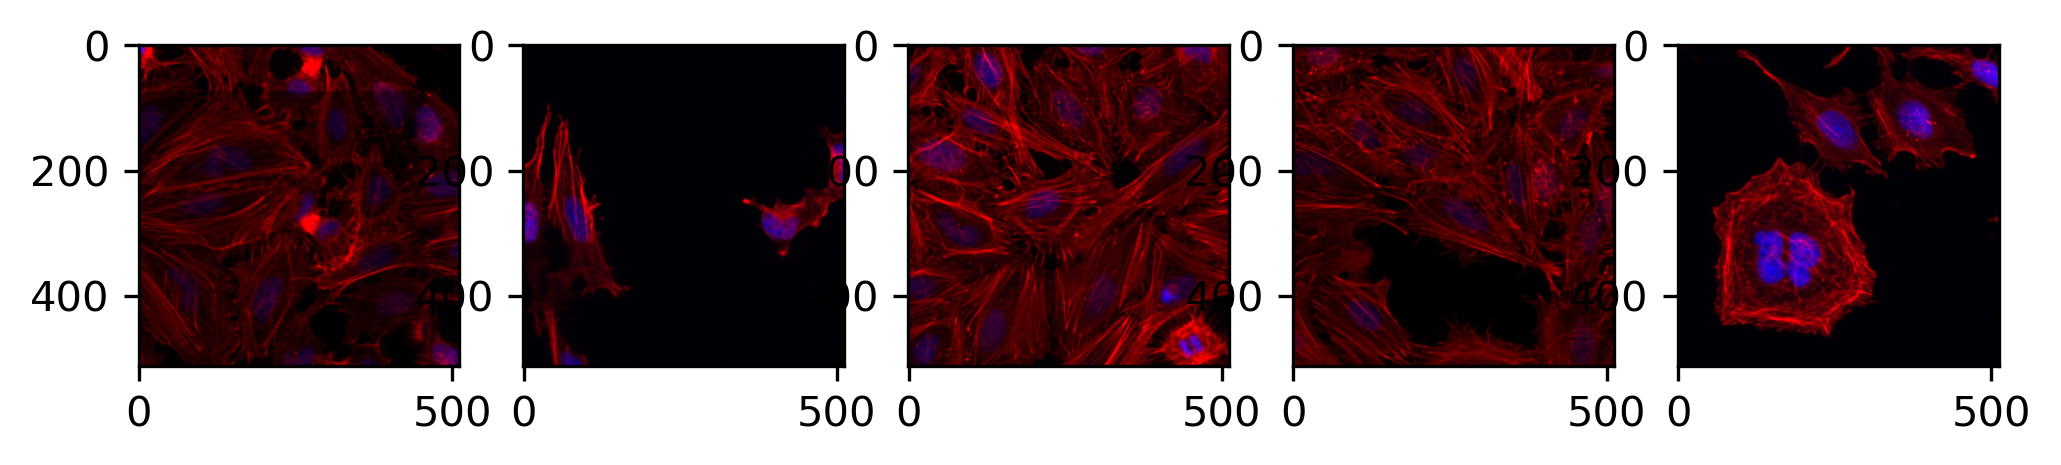

In [54]:
plt.figure(figsize=(8,4))
for k,img in enumerate(imgs[:-1]):
    plt.subplot(1,5,k+1)
    plt.imshow(img)

In [20]:
# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
# channels = [[2,3], [0,0], [0,0]]

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images
# ---------------------------------------------------------------------------------

# imgs_2D = imgs[:-1]
from cellpose import models
model = models.Cellpose(gpu=use_GPU, model_type='cyto')
diameter = 25
flow_threshold = None

channels = [0,0] # R=cytoplasm and B=nucleus
mask, flows, styles, diams = model.eval(img, diameter=diameter, flow_threshold=None, channels=channels)

** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)
time spent: running network 2.48s; flow+mask computation 2.35
estimated masks for 1 image(s) in 4.87 sec
>>>> TOTAL TIME 4.87 sec


C:\Users\lukasvandenheu\Anaconda3\envs\cellpose\lib\site-packages\ipykernel_launcher.py:12: UserWarning: M:\tnw\bn\dm\Shared\Lukas\Experiments\CLM001\HCA\B03\B03_stack_mask.tif is a low contrast image
  if sys.path[0] == '':
C:\Users\lukasvandenheu\Anaconda3\envs\cellpose\lib\site-packages\ipykernel_launcher.py:13: UserWarning: M:\tnw\bn\dm\Shared\Lukas\Experiments\CLM001\HCA\B03\B03_stack_ROI.tif is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  del sys.path[0]


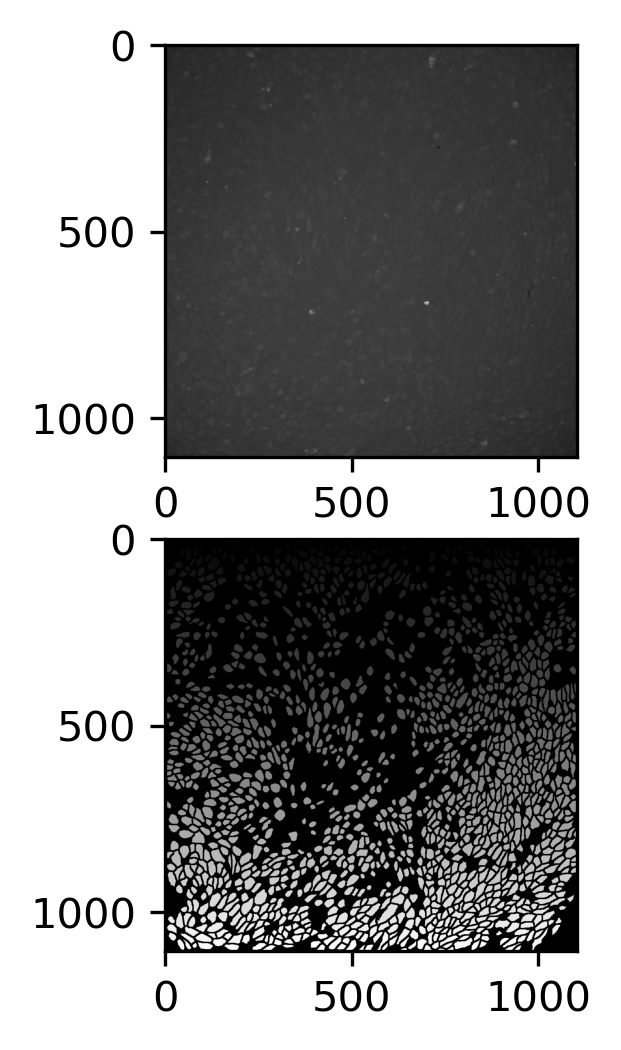

In [30]:
cell_size_threshold = 100 # pixels
mask = remove_small_cells(mask, cell_size_threshold)

plt.figure()
plt.subplot(2,1,1)
plt.imshow(img,cmap='gray')
plt.subplot(2,1,2)
plt.imshow(mask,cmap='gray')

output_mask = os.path.join(directory, 'B03_stack_mask.tif')
output_roi = os.path.join(directory, 'B03_stack_ROI.tif')
io.imsave(output_mask, mask)
io.imsave(output_roi, mask>0)

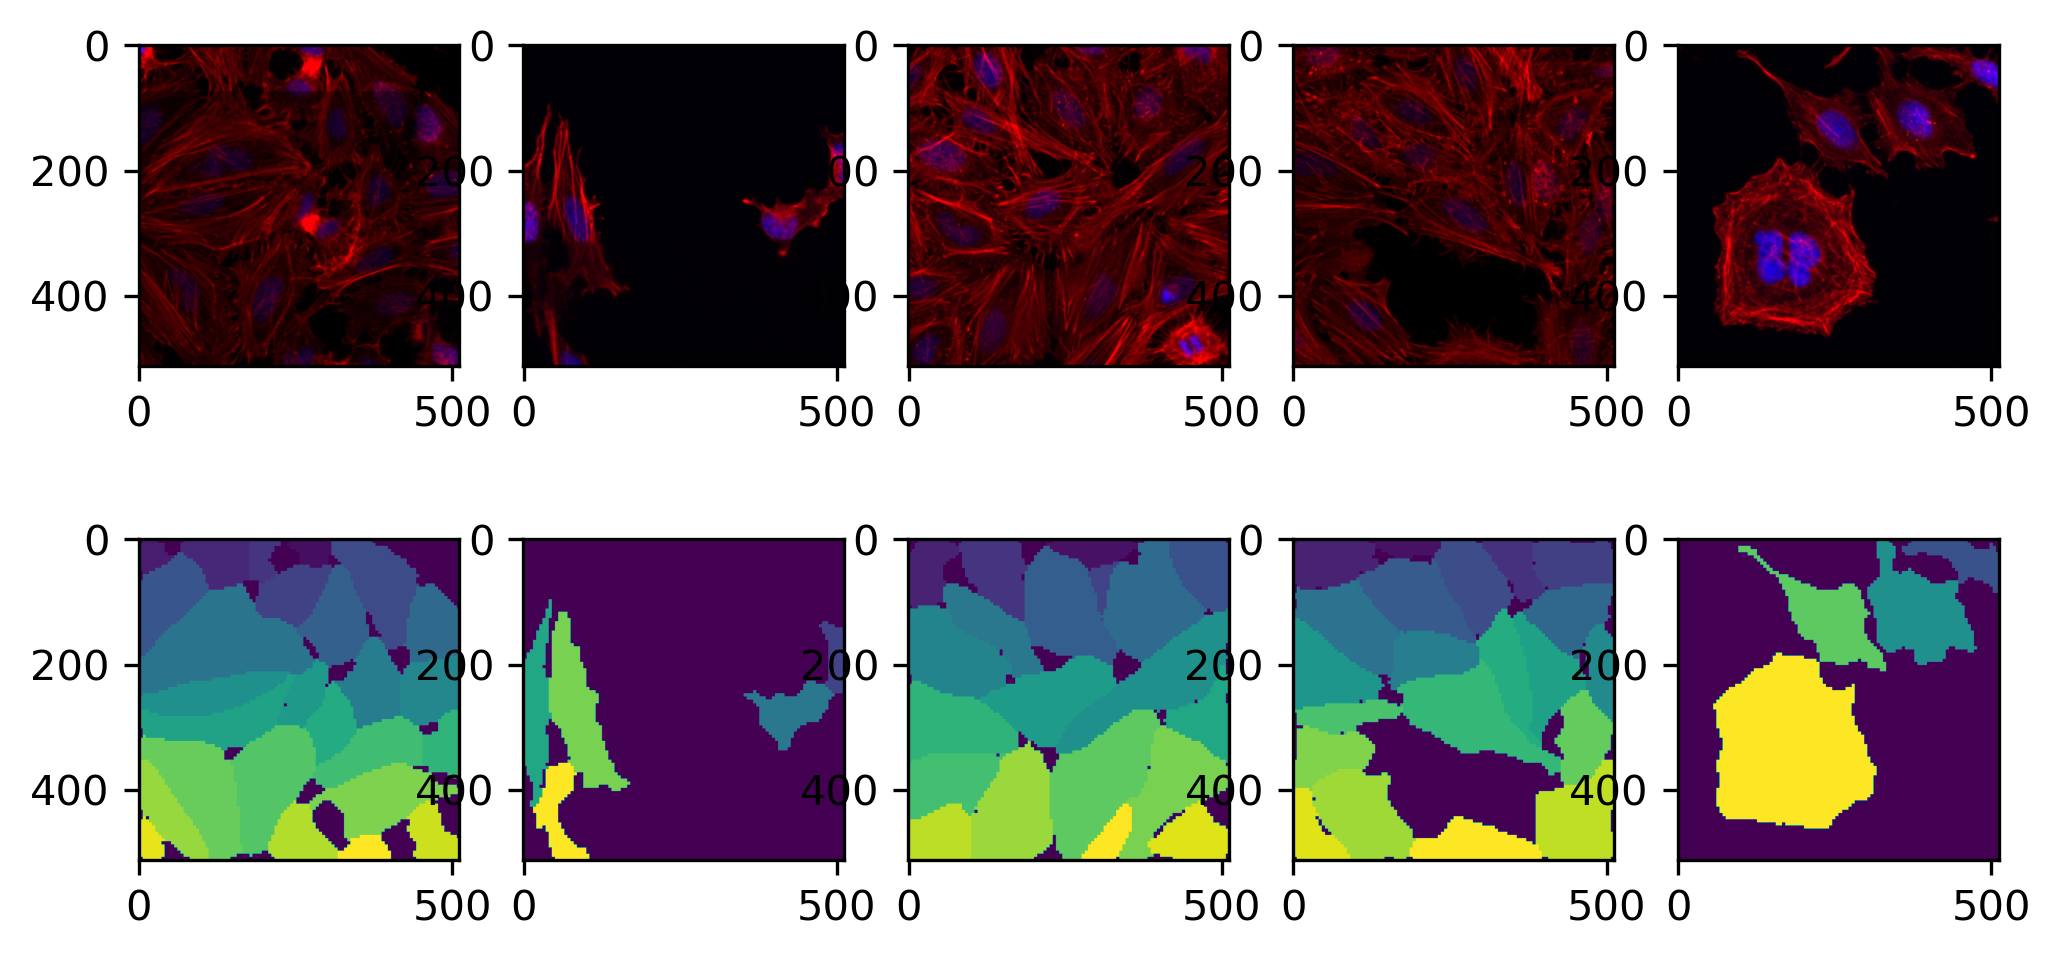

In [16]:
plt.figure(figsize=(8,4))
for k,img in enumerate(imgs[:-1]):
    plt.subplot(2,5,k+1)
    plt.imshow(img)
    plt.subplot(2,5,k+6)
    plt.imshow(masks[k])

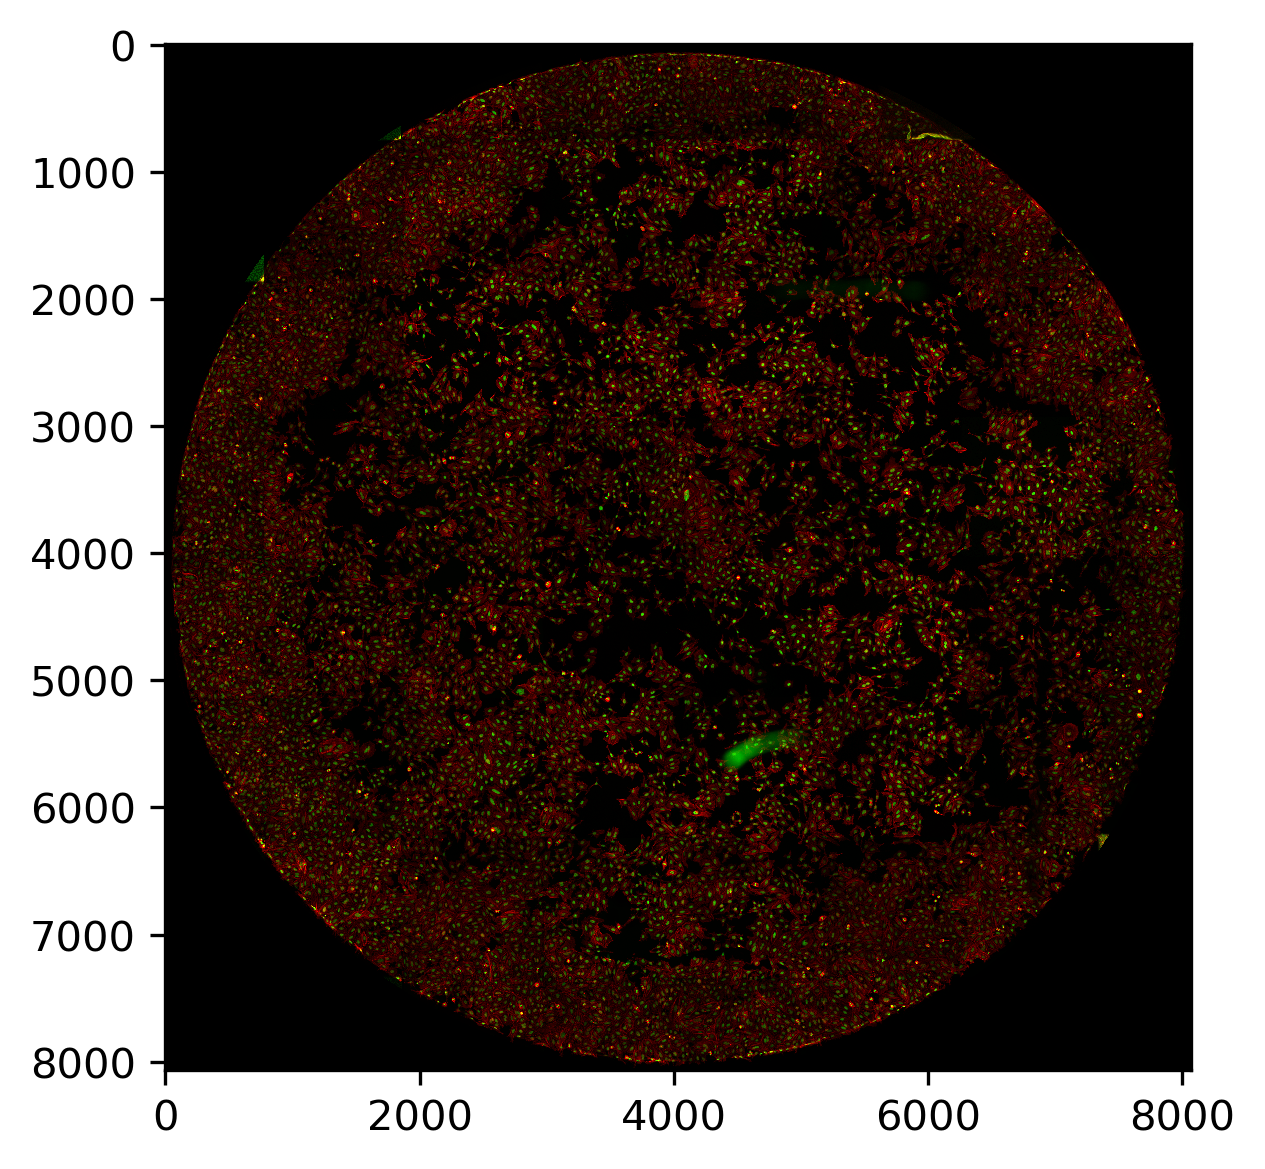

In [133]:
# experiment = 'WKS024'
# magnification = '10x'
# well = 'B02'
fused_path = os.path.join(well, well+'_fused_RGB.tif')

fused = io.imread(fused_path)

io.imshow(fused)

In [136]:
np.shape(fused)

(8064, 8064, 3)

In [220]:
##This is Kasper's trial to get a for loop going over the subimages
from cellpose import models
cytoModel = models.Cellpose(gpu=use_GPU, model_type='cyto')
nucleoModel = models.Cellpose(gpu=use_GPU, model_type='nuclei')
import cv2
import time

** TORCH CUDA version installed and working. **
>>>> using GPU
** TORCH CUDA version installed and working. **
>>>> using GPU


In [ ]:
fused_path = os.path.join(well, well+'_fused_RGB.tif')
fused = io.imread(fused_path)
fusedR = fused[:,:,0]
fusedG = fused[:,:,1]
fusedB = fused[:,:,2]

In [189]:
NewFused.dtype

dtype('float64')

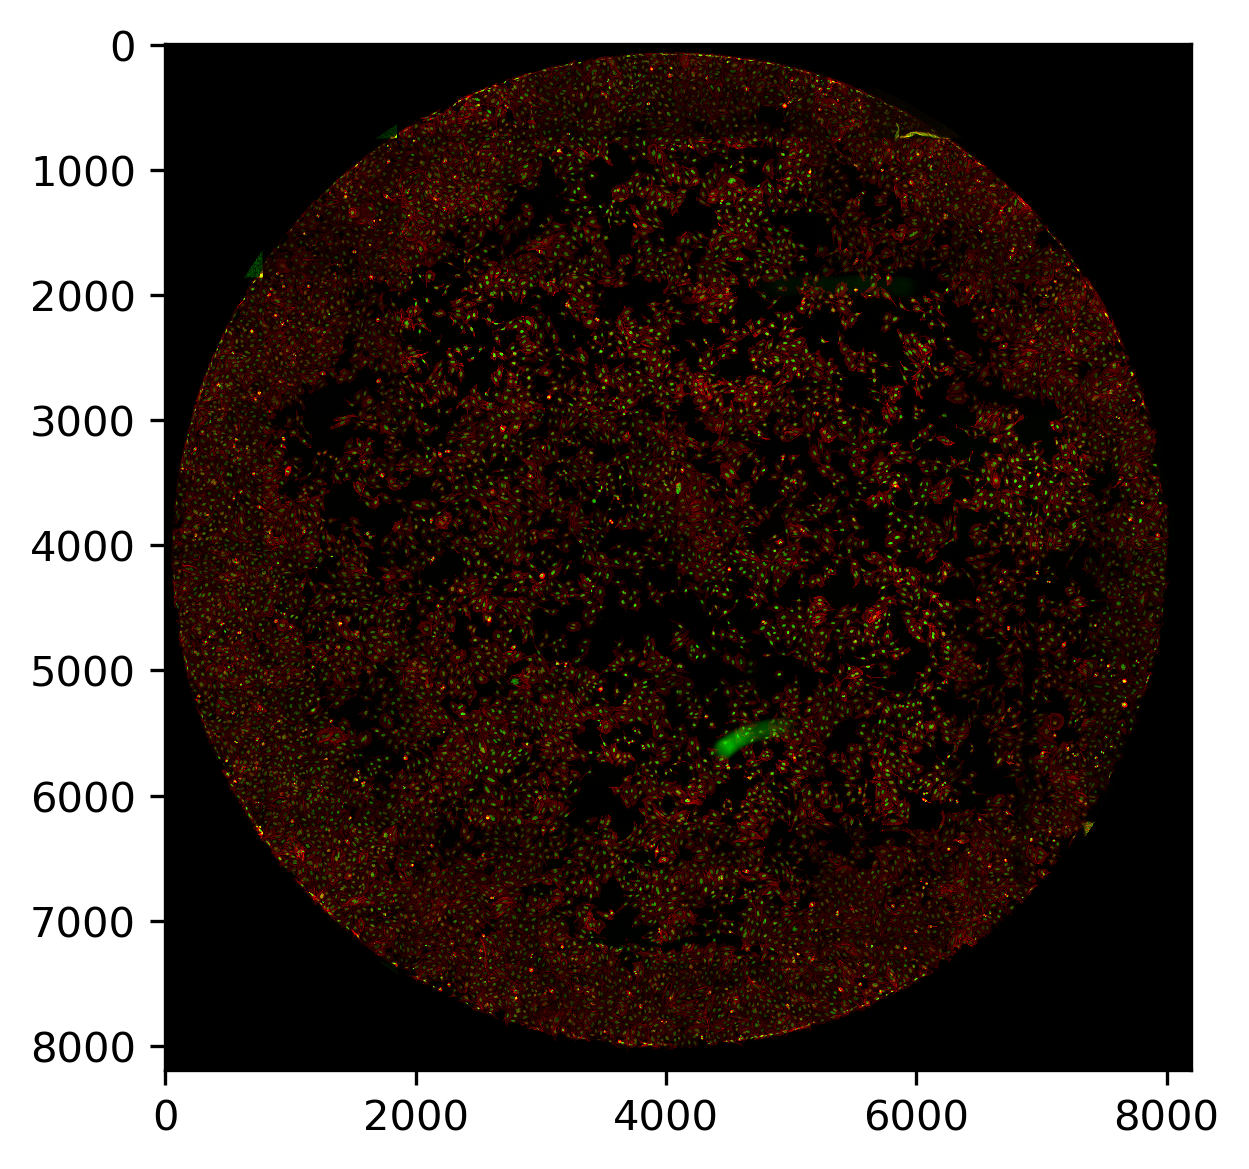

In [190]:
FusedSize = np.shape(fused)
FusedHeight = FusedSize[0]
FusedWidth = FusedSize[1]
[SubFigWidth,SubFigHeight] = [512,512] #pixels

NewFusedHeight = np.ceil(FusedHeight/SubFigHeight).astype(int)*SubFigHeight
NewFusedWidth = np.ceil(FusedWidth/SubFigWidth).astype(int)*SubFigWidth

NewFused = np.zeros([NewFusedHeight,NewFusedWidth,3],dtype='uint8')
NewFused[0:FusedHeight,0:FusedWidth,:] = fused 

io.imshow(NewFused)

In [197]:
channels = [1,2] # R=cytoplasm and G=nucleus
SubFigList = []
for c in range(np.ceil(FusedWidth/SubFigWidth).astype(int)):
    for r in range(np.ceil(FusedHeight/SubFigHeight).astype(int)):
        SubFig = NewFused[r*SubFigHeight:(r+1)*SubFigHeight,c*SubFigWidth:((c+1)*SubFigWidth),:]
        SubFigList.append(SubFig)

In [200]:
masks, flows, styles, diams = cytoModel.eval(SubFigList, diameter=97.3, flow_threshold=None, channels=channels)

processing 256 image(s)


100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [01:46<00:00,  2.39it/s]

time spent: running network 76.15s; flow+mask computation 30.23
estimated masks for 256 image(s) in 109.95 sec
>>>> TOTAL TIME 109.95 sec


In [232]:
#masks, flows, styles, diams = model.eval(SubFig, diameter=97.3, flow_threshold=None, channels=channels)\
thresholdList = []

count = 0
threshFused = np.zeros([NewFusedHeight,NewFusedWidth],dtype='uint8')
maskFused = np.zeros([NewFusedHeight,NewFusedWidth],dtype='uint8')

for c in range(np.ceil(FusedWidth/SubFigWidth).astype(int)):
    for r in range(np.ceil(FusedHeight/SubFigHeight).astype(int)):
        thresh = masks[count] > 0
        threshFused[r*SubFigHeight:(r+1)*SubFigHeight,c*SubFigWidth:((c+1)*SubFigWidth)] = thresh
        maskFused[r*SubFigHeight:(r+1)*SubFigHeight,c*SubFigWidth:((c+1)*SubFigWidth)] = masks[count]
        count = count + 1

threshFused = threshFused[0:FusedHeight,0:FusedWidth]
maskFused = maskFused[0:FusedHeight,0:FusedWidth]

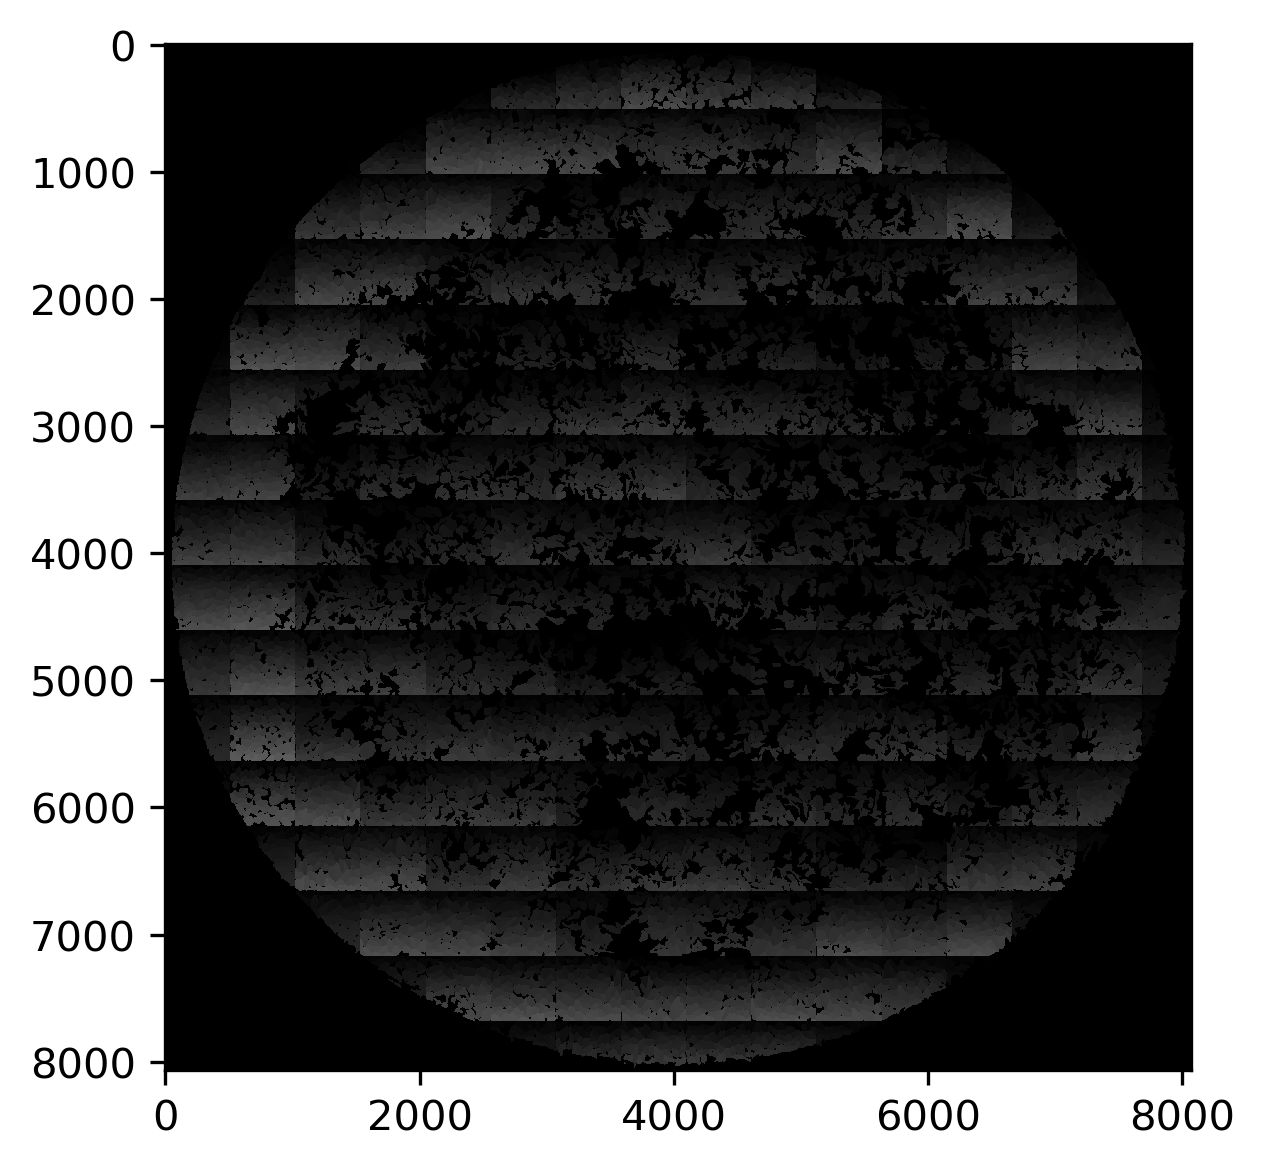

In [233]:
io.imshow(maskFused)
io.imsave('predicted_mask.png',maskFused)

In [65]:
def crop_img(fused, w, ol):
    '''
    This function find the limits of an image dimension s.t. tiles fit inside it.
    The operation is done for one dimension only.
    P = number of pixels of the input image, in one dimension.
    w = width of tile (e.g. 512).
    ol = overlap of tiles (e.g. 100 pixels)
    '''
    
    N,M,C = fused.shape
    
    numtiles = (M - w) / (w - ol) + 1
    numtiles_rounded = np.ceil(numtiles)
    new_M = numtiles_rounded * (w - ol) + w
    size_difference = new_M - M
    
    add1 = np.ceil(size_difference / 2)
    add2 = np.floor(size_difference / 2)
    
    new_fused = np.concatenate((np.zeros((N,add1)),fused,np.zeros((N,add2))))
    
    return new_fused


def create_tiles(cropped_ch, xnumtiles, ynumtiles, w, ol):
    '''
    Create tiles with overlap.
    '''
    xtile_positions = np.arange(0, xnumtiles) * (w - ol)
    ytile_positions = np.arange(0, ynumtiles) * (w - ol)
    
    tiles = []
    for x in xtile_positions:
        for y in ytile_positions:
            x = int(x)
            y = int(y)
            tiles.append(cropped_ch[y:y+w, x:x+w, :])
            
    return tiles

In [64]:
new_fused=crop_img(fused, w, ol)
new_fused.shape

NameError: name 'w' is not defined

In [23]:
w = 512
ol = 100
N,M,C = fused.shape
    
xmin, xmax, xnumtiles = crop_img(M, w, ol)
ymin, ymax, ynumtiles = crop_img(N, w, ol)

> <ipython-input-22-a1c2979b2b80>(12)crop_img()
     10     numtiles = (P - w) / (w - ol) + 1
     11     breakpoint()
---> 12     numtiles_rounded = np.floor(numtiles)
     13 
     14     num_included = numtiles_rounded * (w - ol) + w

ipdb> numtiles 
19.33009708737864
ipdb> exit


BdbQuit: 